In [1]:
import numpy as np

In [40]:
class Solution(object):
    def binarySearch1D(self, nums, target):
        k = int(len(nums)/2)
        if len(nums) == 0:
            return False
        elif nums[k] == target:
            return True
        elif len(nums) == 1:
            return False
        elif nums[k] > target:
            return self.binarySearch1D(nums[0:k], target)
        else:
            return self.binarySearch1D(nums[k+1:], target) 

    def recursiveMatrixSearch(self, matrix, target):
        M = matrix.shape[0]
        N = matrix.shape[1]
        if M == 0 or N == 0:
            return False
        
        if (target < matrix[0,0]) or (target > matrix[M-1,N-1]):
            return False
        
        if M == 1:
            return self.binarySearch1D(matrix[0,:], target)
        elif N == 1:
            return self.binarySearch1D(matrix[:,0], target)
        
        mid_r = int(M/2)
        mid_c = int(N/2)
        
        matrix1, matrix2 = None, None
        if target == matrix[mid_r, mid_c]:
            return True
        elif target > matrix[mid_r, mid_c]:
            matrix1 = matrix[mid_r+1:M, 0:mid_c+1]
            matrix2 = matrix[:,mid_c+1:N]
        else:
            matrix1 = matrix[mid_r:M, 0:mid_c]
            matrix2 = matrix[0:mid_r,:]
        in_matrix1 = self.recursiveMatrixSearch(matrix1, target)
        if in_matrix1:
            return True
        else:
            return self.recursiveMatrixSearch(matrix2, target)

    def searchMatrix(self, matrix, target):
        """
        :type matrix: List[List[int]]
        :type target: int
        :rtype: bool
        """
        if len(matrix) == 0:
            return False
        else:
            return self.recursiveMatrixSearch(np.asarray(matrix), target)
    
    def altMatrixSearch(self, matrix, target):
        if len(matrix) == 0:
            return False
        M = matrix.shape[0]
        N = matrix.shape[1]
        x = 0
        y = M - 1
        while (x < M and y >= 0):
            if target == matrix[x,y]:
                return True
            elif target > matrix[x,y]:
                x += 1
            else:
                y -= 1
        return False

In [41]:
s = Solution()
a = np.asarray([
  [1,   4,  7, 11, 15],
  [2,   5,  8, 12, 19],
  [3,   6,  9, 16, 22],
  [10, 13, 14, 17, 24],
  [18, 21, 23, 26, 30]
])
s.recursiveMatrixSearch(a, 5)

True

In [42]:
s.altMatrixSearch(a, 5)

True

In [54]:
import time as time
t1 = []
t2 = []
for i in range(6):
    size = 10**(i+4)
    M = 10**(int((i+4)/2))
    N = 10**(i+4 - int((i+4)/2))
    b = np.arange(size).reshape(M, N)
    tic = time.time()
    for j in range(50):
        _ = s.altMatrixSearch(b, b[M-1,0])
    toc = time.time()
    t1.append((toc - tic)/50)
    tic = time.time()
    for j in range(50):
        _ = s.recursiveMatrixSearch(b, b[M-1,0])
    toc = time.time()
    t2.append((toc - tic)/50)

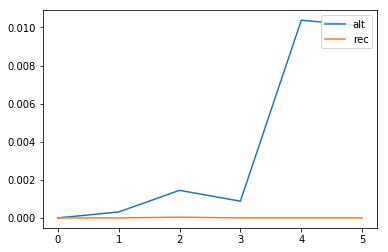

In [55]:
import matplotlib.pyplot as plt
plt.plot(np.arange(len(t1)), t1, label='alt')
plt.plot(np.arange(len(t2)), t2, label='rec')
plt.legend(loc='upper right')
plt.show()